In [5]:
# Just an example of how to plot some results
library(data.table)
library(ggplot2)
library(scales)
library(Hmisc)
theme_set(theme_bw(20))
library(tidyr)
library(dplyr)
library(plyr)

Warning message:
“package ‘data.table’ was built under R version 3.6.3”
Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


A

In [ ]:
setwd("/home/yuhaodu/workplace_gender/R/")

In [6]:
read_file <- function(file_name){
res_dir = file_name
print(list.files(path=paste0("../",res_dir),
                                        pattern="turn_output_[0-9].tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0("../",res_dir),
                                        pattern="turn_output_[0-9].tsv",
                                        full.names = T),fread))
setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","turn","level_iter","run_number","replication_number"))
params <- fread(paste0("../",res_dir,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


read_file_Single <- function(dir_name,file_name){
sim_res2 = fread(paste0(dir_name,'/',file_name))
setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","turn","level_iter","run_number","replication_number"))
params <- fread(paste0(dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


In [8]:
file = read_file_Single('/home/yuhaodu/workplace_gender/NYT_results_0_5','3.tsv')

ERROR: Error in setnames(sim_res2, c("fem_prom", "fem_suc", "fem_fail", "fem_promotion_missed", : Can't assign 18 names to a 11 column data.table


In [ ]:
tmp <- read_file_Single('../NYT_figure12','0.02_1.01_0.01_2.tsv')

In [ ]:
write.csv(tmp,'../NYT_send/0.02_1.01_0.01_2.tsv') 

tmp

In [13]:
read_file_promotion_cycle <- function(file_name){
res_dir = file_name
print(list.files(path=paste0("../",res_dir),
                                        pattern="turn_output_[0-9].tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0("../",res_dir),
                                        pattern="turn_output_[0-9].tsv",
                                        full.names = T),fread))
setnames(sim_res2,c("n_men","n_women",'men_leave','women_leave',
                    'men_promoted','women_promoted',"promotion_cycle",
                    "level_iter","run_number","replication_number",'bias_level'))
params <- fread(paste0("../",res_dir,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[promotion_cycle %% 24 == 0]
sim_res2$promotion_cycle <- sim_res2$promotion_cycle / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


read_file_promotion_cycle_Single <- function(dir_name,file_name){
sim_res2 = fread(paste0(dir_name,'/',file_name))
setnames(sim_res2,c("n_men","n_women",'men_leave','women_leave',
                    'men_promoted','women_promoted',"promotion_cycle",
                    "level_iter","run_number","replication_number",'bias_level'))
params <- fread(paste0(dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[promotion_cycle %% 24 == 0]
sim_res2$promotion_cycle <- sim_res2$promotion_cycle / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}

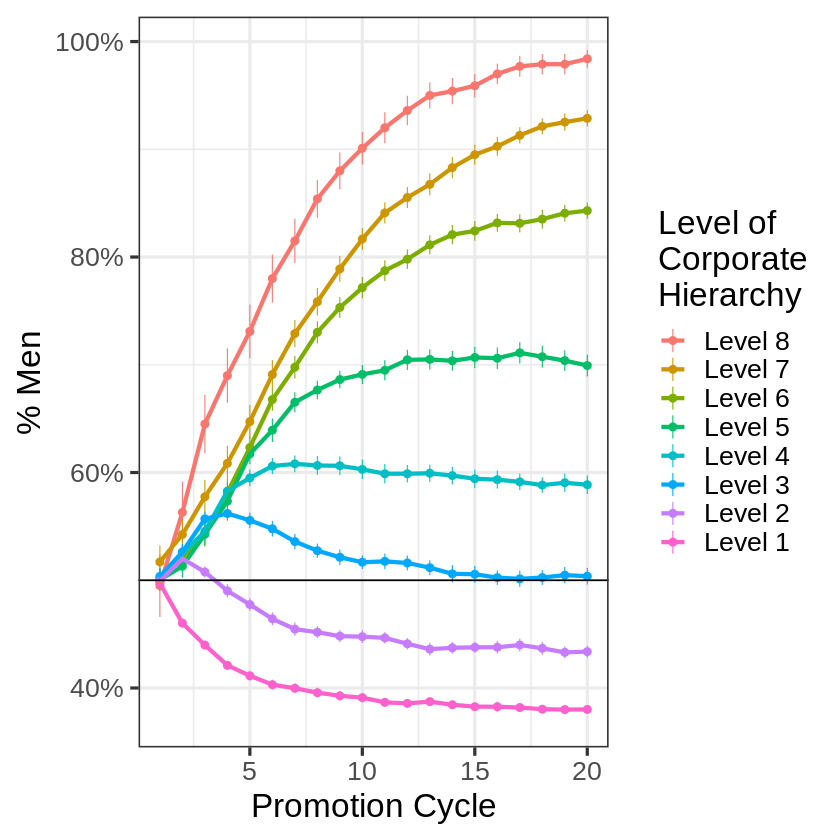

In [51]:
file = read_file_promotion_cycle_Single('/home/yuhaodu/workplace_gender/NYT_Rep_Fig12','0.01_0.01_0.01_0.01_0.1_1.2_2_promotion.tsv')
# file = read_file_promotion_cycle_Single('/home/yuhaodu/workplace_gender/NYT_figure12','0.02_1.01_0.01_2_promotion.tsv')
write.csv(file,'/home/yuhaodu/workplace_gender/NYT_send/0.01_paper.tsv')
p <- ggplot(file,aes(promotion_cycle,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = .5) + 
    scale_y_continuous("% Men", labels=percent) + 
    xlab("Promotion Cycle") + 
    scale_color_discrete("Level of\nCorporate\nHierarchy")+
    theme(strip.text.x= element_text(size=14))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p

# file = read_file_promotion_cycle_Single('/home/yuhaodu/workplace_gender/NYT_figure12','0.03_0.03_0.03_0.03_0.03_1.03_2_promotion.tsv')
# write.csv(file,'/home/yuhaodu/workplace_gender/NYT_send/0.06_1.03_0.03_2_promotion.tsv')

write.csv(file,'/home/yuhaodu/workplace_gender/NYT_send/0.01_ori_paper.tsv')



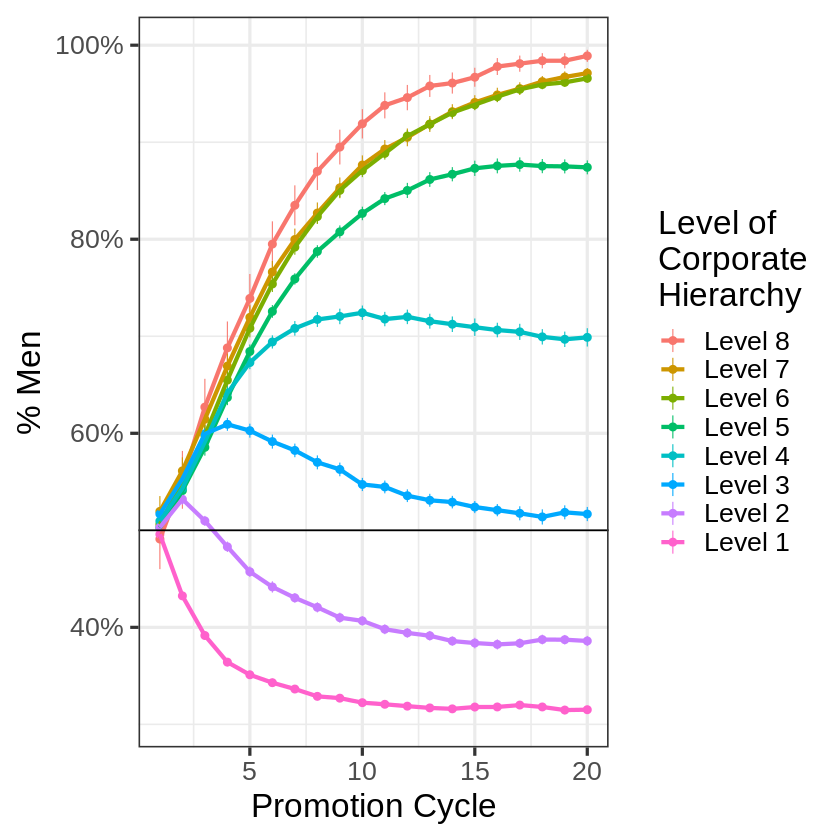

In [53]:
file = read_file_promotion_cycle_Single('/home/yuhaodu/workplace_gender/NYT_Rep_Fig12','0.03_0.03_0.03_0.03_0.1_1.2_2_promotion.tsv')
p <- ggplot(file,aes(promotion_cycle,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = .5) + 
    scale_y_continuous("% Men", labels=percent) + 
    xlab("Promotion Cycle") + 
    scale_color_discrete("Level of\nCorporate\nHierarchy")+
    theme(strip.text.x= element_text(size=14))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p

write.csv(file,'/home/yuhaodu/workplace_gender/NYT_send/0.03_ori_paper.tsv')

In [ ]:
read_file <- function(file_name){
res_dir = file_name
print(list.files(path=paste0("../",res_dir),
                                        pattern="*.tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0("../",res_dir),
                                        pattern="*.tsv",
                                        full.names = T),fread))
setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","promotion_cycle","level_iter","run_number","replication_number"))
params <- fread(paste0("../",res_dir,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


In [ ]:
read_file_send <- function(file_name){
res_dir = file_name
print(list.files(path=paste0("../",res_dir),
                                        pattern="*.tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0("../",res_dir),
                                        pattern="*.tsv",
                                        full.names = T),fread))
# setnames(sim_res2,c('level_iter','promotion_cycle','mean_men','mean_women','mean_men_leave', 
# 'mean_women_leave','mean_men_promoted','mean_women_promoted',
# 'sd_men','sd_women','sd_men_leave' , 
# 'sd_women_leave','sd_men_promoted','sd_women_promoted'))
# params <- fread(paste0("../",res_dir,"/experiment_details.csv"))
# sim_res2 <- merge(sim_res2,params, by="run_number")
# sim_res2 <- sim_res2[turn %% 24 == 0]
# sim_res2$turn <- sim_res2$turn / 24 + 1
# sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}



In [ ]:
read_eachFile <- function(dir_name,file_name){

sim_res2 = fread(paste0("../",dir_name,"/",file_name))

setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","promotion_cycle","level_iter","run_number","replication_number"))
params <- fread(paste0("../",dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


In [ ]:
read_eachFile <- function(dir_name,file_name){

sim_res2 = fread(paste0("../",dir_name,"/",file_name))

setnames(sim_res2,c("n_men","n_women",'men_leave','women_leave','men_promoted','women_promoted',"promotion_cycle","level_iter","run_number","replication_number",'bias_level'))
params <- fread(paste0("../",dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[promotion_cycle %% 24 == 0]
sim_res2$promotion_cycle <- sim_res2$promotion_cycle / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}



In [ ]:
for (i in list.files(path = "../NYT_results_0_5/", pattern = '.tsv')){
    print(i)
    df = read_eachFile('NYT_results_0_5',i)
    df = df %>% 
    dplyr::group_by(level_iter,promotion_cycle) %>% 
    dplyr::summarize(mean_men = mean(n_men),mean_women = mean(n_women),mean_men_leave = mean(men_leave), 
        mean_women_leave = mean(women_leave),mean_men_promoted = mean(men_promoted),mean_women_promoted = mean(women_promoted),
        sd_men = sd(n_men),sd_women = sd(n_women),sd_men_leave = sd(men_leave), 
        sd_women_leave = sd(women_leave),sd_men_promoted = sd(men_promoted),sd_women_promoted = sd(women_promoted),
     mean_bias = mean(bias_level),sd_bias = sd(bias_level))
#     write.csv(x=df, file=paste0("../NYT_results_0_5_send/",i))
}

In [ ]:
read_each_agent <- function(dir_name,file_name){

sim_res2 = fread(paste0(dir_name,'/',file_name))

setnames(sim_res2,c('agent_id', 'promotion_cycle', 'perceived_promotability', 'num_successful_proj', 'num_failed_proj', 'level_iter','is_male'))
params <- fread(paste0(dir_name,"/experiment_details.csv"))
# sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[promotion_cycle %% 24 == 0]
sim_res2$promotion_cycle <- sim_res2$promotion_cycle / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}

In [ ]:
for (i in list.files(path = "../NYT_figure4/", pattern = '_2_agent.tsv')){
    print(i)
    df = read_each_agent('../NYT_figure4',i)
    write.csv(x=df, file=paste0("../NYT_send/",i))
}

In [ ]:
filename = '168_312_0.7_2_agent.tsv'

df = read_each_agent('../NYT_figure4',filename)
write.csv(x = df,file = paste0('../NYT_send/',filename))

In [ ]:
write.csv(x = df,file = '../NYT_send/168_240_0.4_2_agent.tsv')

In [ ]:
df <- read_file_send('NYT_results_0_5_send/')
df$type <- rep(c(0.01,0.02,0.03,0.04,0.05,0),160) 
w = 13.5
h=4
options(repr.plot.width = w, repr.plot.height = h)
p <- ggplot(df,aes(promotion_cycle,mean_men/(mean_men+mean_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = .5) + 
    scale_y_continuous("% Men", labels=percent) + 
    xlab("Promotion Cycle") + 
    facet_grid(~type)+ 
    scale_color_discrete("Level of\nCorporate\nHierarchy")+
    theme(strip.text.x= element_text(size=14))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p

In [ ]:
df <- read_file_Single('../NYT_potential','0.06_1.03_0.03_2.tsv')

w = 5
h=4
options(repr.plot.width = w, repr.plot.height = h)
p <- ggplot(df,aes(turn,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = .5) + 
    scale_y_continuous("% Men", labels=percent) + 
    xlab("Promotion Cycle") + 
    scale_color_discrete("Level of\nCorporate\nHierarchy")+
    theme(strip.text.x= element_text(size=14))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p

In [ ]:
## 


RewardLess <- read_file('NYT_RewardLess')
PenaltyMore <- read_file('PenaltyMore')
allBias <- read_file('allBias')
noBias <- read_file('noBias')
MixedRewardLess <- read_file('MixedRewardLess')
MixedPenaltyMore <- read_file('MixedPenaltyMore')
Complain <- read_file('Complain')
allBias <- read_file('allBias')
stretchProject <- read_file('UnfairStretchAssignment')
allBias <- allBias[turn <= 20]

tmp <- rbind(RewardLess,PenaltyMore,noBias,MixedRewardLess,MixedPenaltyMore,Complain,allBias,stretchProject,fill=TRUE)
tmp$type <- factor(tmp$type, 
                   levels = c("noBias","UnfairStretchAssignment","Complain","MixedPenaltyMore",
                              "MixedRewardLess","PenaltyMore","NYT_RewardLess","allBias"))


In [ ]:
tmp$type_name <- mapvalues(tmp$type, c("noBias",
                                       "UnfairStretchAssignment",
                                       "Complain",
                                      "MixedPenaltyMore",
                                      "MixedRewardLess",
                                      "PenaltyMore",
                                      "NYT_RewardLess",
                                      "allBias"),
                          c("No Biases",
                            "Penalty\nStretch\nProject",
                           "Penalty\nNon-Altruism",
                           "Penalty\nMixed Group\nFailure",
                           "Reward\nMixed Group\nSucces",
                           "Penalty\nIndividual\nFailure",
                           "Reward\nIndividual\nSuccess",
                           "All Biases"))

In [ ]:


w = 13.5
h=4
options(repr.plot.width = w, repr.plot.height = h)
p <- ggplot(tmp,aes(turn,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = .5) + 
    scale_y_continuous("% Men", labels=percent) + 
    xlab("Promotion Cycle") + 
    facet_grid(~type_name)+ 
    scale_color_discrete("Level of\nCorporate\nHierarchy")+
    theme(strip.text.x= element_text(size=14),plot.margin = margin(1,0.5,0.5,1.5,unit = 'cm'))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p
# ggsave('../resultImage/AccBias.pdf',width =w,height=h)
# options(repr.plot.width = w, repr.plot.height = h)
# p <- ggplot(tmp[fem_bias!=-1 & type !="UnfairStretchAssignment" ],aes(turn,fem_bias,color=level_iter)) +
#     stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
#     stat_summary(fun.y="mean",geom="line",size=1.2)  + 
#     geom_hline(yintercept = 0) +
#      scale_y_continuous("Avg. Num.\n Biases Women\nEncounter") + 
#     xlab("Promotion Cycle")+ 
#  facet_grid(~type_name)+ 
# scale_color_discrete("Level of\nCorporate\nHierarchy") +
#     theme(strip.text.x= element_text(size=14), plot.margin = margin(1,0.5,0.5,0.55,unit = 'cm') )
# p

In [ ]:
options(repr.plot.width = w, repr.plot.height = h)
p <- ggplot(tmp[fem_bias!=-1 & type !="UnfairStretchAssignment" ],aes(turn,fem_bias,color=level_iter)) +
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = 0) +
     scale_y_continuous("Avg. Num.\n Biases Women\nEncounter") + 
    xlab("Promotion Cycle")+ 
 facet_grid(~type_name)+ 
scale_color_discrete("Level of\nCorporate\nHierarchy") +
    theme(strip.text.x= element_text(size=14), plot.margin = margin(1,0.5,0.5,0.5,unit = 'cm') )
p
ggsave('../resultImage/NumBias.pdf',width =w,height=h)

In [ ]:
w = 10
h=4
options(repr.plot.width = w, repr.plot.height = h)
tmp <- rbind(RewardLess,noBias,allBias,fill=T)
tmp$type <- factor(tmp$type, levels = c("noBias","RewardLess","allBias"),
                  labels=c("No Biases",
                           "- Reward\nIndividual Success",
                           "All Biases"))
tmp$fem_diff <- tmp$fem_suc - tmp$fem_fail
tmp$male_diff <- tmp$male_suc - tmp$male_fail
tmp$level_iter <- factor(tmp$level_iter,levels=c('Level 1','Level 2','Level 3','Level 4','Level 5',
                                                  'Level 6','Level 7','Level 8'), labels=1:8)
#melt(tmp,id=c('level_iter','type','run_number'),measure=c("fem_diff","male_diff"))[value!=-1]
p <- ggplot(melt(tmp[fem_bias!=-1],id=c('level_iter','type','replication_number','turn'),
                 measure=c("fem_diff","male_diff"))[value!=-1 & turn == 20]) +
 stat_summary(aes(x=level_iter,y=value,color=variable),fun.data="mean_cl_normal") +
stat_summary(aes(x=level_iter,y=value,group=variable,color = variable),fun.y="mean",geom="line",size=1.2) +
    geom_hline(yintercept = 0)+
scale_y_continuous("Num of Succ Projects -\nNum of Failed Projects") + xlab("Level")+
theme(strip.text.x= element_text(size=12))+
facet_grid(~type)+ 
scale_color_discrete("Gender", labels=c("Women","Men")) 
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p
ggsave('/home/kjoseph/gender_bias_img/DiffBias.pdf',width =w,height=h)

In [ ]:
w = 15
h= 4
options(repr.plot.width = w, repr.plot.height = h)
weight <- read_file('WithDownwardCausation')
weight2 <- read_file('WithoutDownwardCausation')
weight2$weight = as.character(weight2$weight)
weight2$weight = 'without'
# weight2$weight = 'without'
weight = rbind(weight,weight2,fill= TRUE)
# Second Plot
p <- ggplot(weight[weight != "without"],aes(turn,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y="mean",geom="line",size=1.2) + 
    geom_hline(yintercept = .5) +
    scale_y_continuous("% Men at Level", labels=percent) + 
    xlab("Promotion Cycle") +
    scale_color_discrete("Level of\nCorporate\nHierarchy") +
    facet_grid(~weight) 
# p <- p + theme(axis.title.y = element_text(size=12))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p
# ggsave('/home/kjoseph/gender_bias_img/ImpactOfWeight.pdf',width =w,height=h)

In [ ]:
############
############
####   For NYT
############
############

read_file <- function(file_name){
res_dir = file_name
print(list.files(path=paste0("../",res_dir),
                                        pattern="*_2.tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0("../",res_dir),
                                        pattern="*_2.tsv",
                                        full.names = T),fread))
setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","turn","level_iter","run_number","replication_number"))
params <- fread(paste0("../",res_dir,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


w = 15
h= 4
options(repr.plot.width = w, repr.plot.height = h)
weight <- read_file('NYT_figure2')

# weight$weight = as.character(weight2$weight)
# weight2$weight = 'without'
# weight2$weight = 'without'
# weight = rbind(weight,weight2,fill= TRUE)
# Second Plot
p <- ggplot(weight[weight != "without"],aes(turn,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y="mean",geom="line",size=1.2) + 
    geom_hline(yintercept = .5) +
    scale_y_continuous("% Men at Level", labels=percent) + 
    xlab("Promotion Cycle") +
    scale_color_discrete("Level of\nCorporate\nHierarchy") +
    facet_grid(~weight) 
# p <- p + theme(axis.title.y = element_text(size=12))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p
# ggsave('/home/kjoseph/gender_bias_img/ImpactOfWeight.pdf',width =w,height=h)

In [ ]:
read_promotion_file <- function(dir_name,file_name){

sim_res2 = fread(paste0("../",dir_name,"/",file_name))

setnames(sim_res2,c("n_men","n_women",'men_leave','women_leave','men_promoted','women_promoted',"turn","level_iter","run_number","replication_number",'bias_level'))
params <- fread(paste0("../",dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}



In [ ]:
for (file in list.files(path=paste0('../','NYT_figure3'),pattern='*2_promotion.tsv')){
    tmp <- read_promotion_file('NYT_figure3',file)
    write.csv(tmp, paste0('../NYT_send/',file))
}
# tmp <- read_promotion_file('NYT_figure12','0.02_1.01_0.01_2_promotion.tsv')
# write.csv(tmp, paste0('../NYT_send/','0.01_2_population.tsv'))

In [ ]:
read_file_promotion_cycle <- function(file_name){
res_dir = file_name
print(list.files(path=paste0("../",res_dir),
                                        pattern="*2.tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0("../",res_dir),
                                        pattern="*2.tsv",
                                        full.names = T),fread))
setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","promotion_cycle","level_iter","run_number","replication_number"))
params <- fread(paste0("../",res_dir,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[promotion_cycle %% 24 == 0]
sim_res2$promotion_cycle <- sim_res2$promotion_cycle / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}





h=15
w=15
intervention <- read_file_promotion_cycle('NYT_figure4')
intervention[ , promotion_interv := factor(promotion_intervention_span,
                                          levels=c('[168, 240]',
                                                   '[168, 312]',
                                                   '[168, 384]'),
                                          labels=c("3 Prom. Cycles","6 Prom. Cycles","9 Prom. Cycles"))]
intervention[ , promotion_norm := factor(promotion_intervention_norm,
                                          levels=c(0.4,
                                                   0.7,
                                                   1),
                                          labels=c("Moderate\nMacro Norms",
                                                   "Low\nMacro Norms",
                                                   "No\nMacro Norms"))]
g <- ggplot(intervention[promotion_cycle <=75],aes(x=promotion_cycle,y=n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data = "mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y='mean',geom='line',size=1.2) + 
    geom_hline(yintercept=0.5) +
    scale_y_continuous("% Men at Level",labels = percent) + 
    xlab("Promotion Cycle") +
    facet_grid(promotion_interv~promotion_norm) +
    scale_color_discrete("Level of\nCorporate\nHierarchy") +
    geom_vline(xintercept = 7, size=1.2,linetype="dashed",color="darkgrey")
options(repr.plot.width = w, repr.plot.height = h)
g
# ggsave('/home/kjoseph/gender_bias_img/Intervention.pdf',width=w,height=h)

In [ ]:
df = intervention %>% 
dplyr::group_by(level_iter,turn,promotion_norm,promotion_interv) %>% 
dplyr::summarize(mean_men = mean(n_men),mean_women = mean(n_women),mean_men_leave = mean(men_leave), 
mean_women_leave = mean(women_leave),mean_men_promoted = mean(men_promoted),mean_women_promoted = mean(women_promoted),
sd_men = sd(n_men),sd_women = sd(n_women),sd_men_leave = sd(men_leave), 
sd_women_leave = sd(women_leave),sd_men_promoted = sd(men_promoted),sd_women_promoted = sd(women_promoted),
mean_bias = mean(bias_level),sb_bias = sd(bias_level))
#     write.csv(x=df, file=paste0("../NYT_result_send/",i))



In [ ]:
write.csv(x=df, file=paste0("../NYT_result_send/",'intervention'))

In [ ]:
intervention <- read_file_promotion_cycle('NYT_figure4')